In [3]:
from sklearn.model_selection import GridSearchCV
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn import metrics
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import roc_curve, auc
from nltk.stem.porter import PorterStemmer
from sklearn.neighbors import KNeighborsClassifier
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn import model_selection
from sklearn.model_selection import RandomizedSearchCV
data = pd.read_csv('hour.csv')
print(data.shape)

(17379, 17)


In [0]:
data.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [0]:
data.dtypes

instant         int64
dteday         object
season          int64
yr              int64
mnth            int64
hr              int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object

In [0]:
data.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

[Text(0.5,1,'Use of the system during weekdays and weekends')]

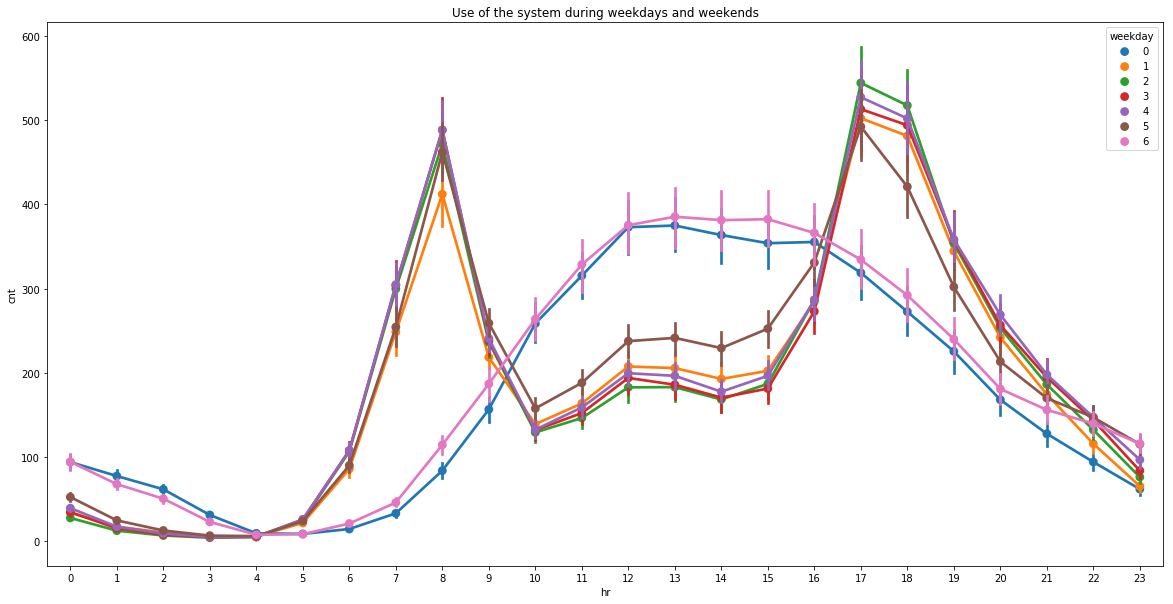

In [0]:
fig, ax = plt.subplots(figsize=(20,10))
sn.pointplot(data=data[['hr',
                       'cnt',
                       'weekday']],
            x='hr', y='cnt',
            hue='weekday', ax=ax)
ax.set(title="Use of the system during weekdays and weekends")

<h4>We can see that there is surge inbetween 7 to 8 hours and 17 to 18 hrs in the weekdays of 1,2,3,4 which implies all the weekdays experience high demand </h4>

[Text(0.5,1,'Use of the system by casual users')]

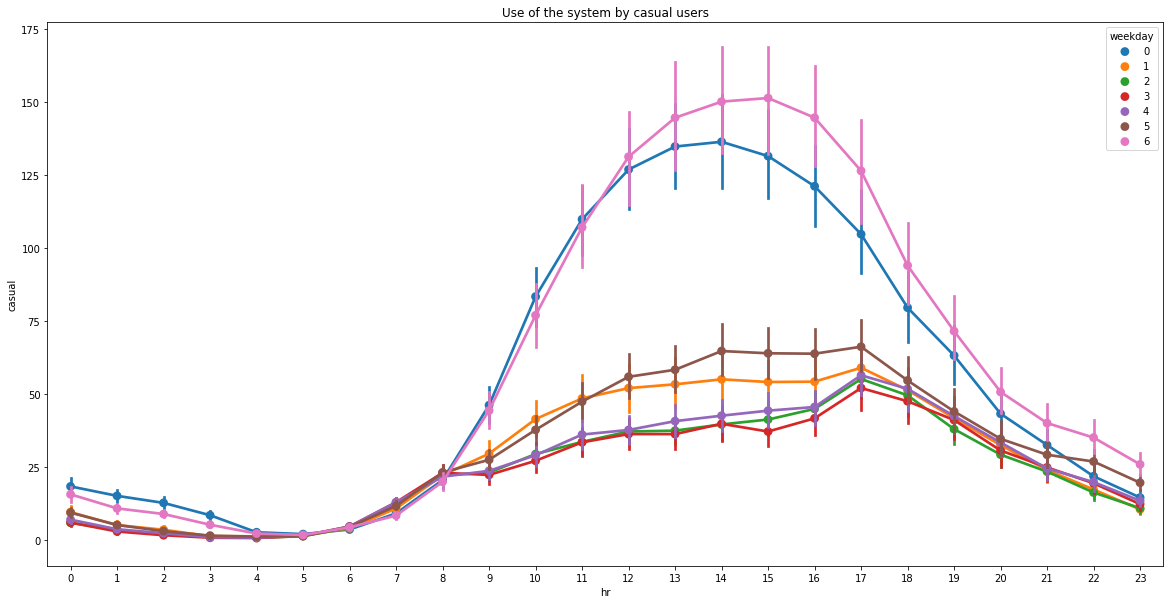

In [0]:
fig, ax = plt.subplots(figsize=(20,10))
sn.pointplot(data=data[['hr',
                       'casual',
                       'weekday']],
            x='hr', y='casual',
            hue='weekday', ax=ax)
ax.set(title="Use of the system by casual users")


<h4>We can see that the casual users have surge in the week ends than the week days which reach upto 150 and above</h4>

[Text(0.5,1,'Use of the system: season')]

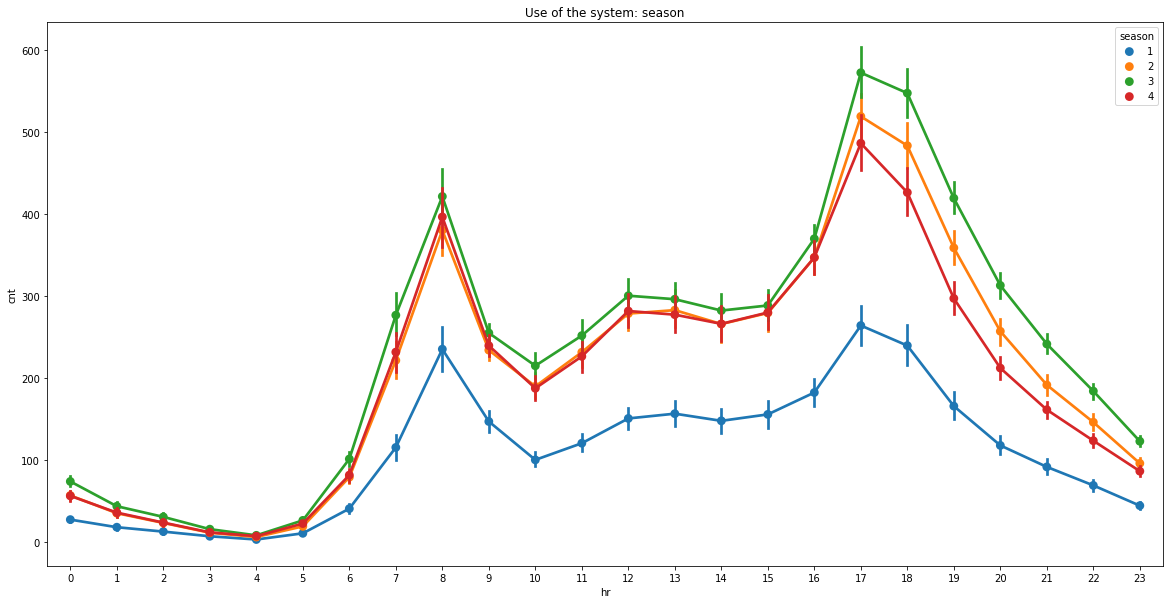

In [0]:
fig, ax = plt.subplots(figsize=(20,10))
sn.pointplot(data=data[['hr',
                       'cnt',
                       'season']],
            x='hr', y='cnt',
            hue='season', ax=ax)
ax.set(title="Use of the system: season")

<h4>We can see that except in season1 all other seasons have surge in demand between 17 to 18 hours and on the 8 hour with season 3 being slightly prominent than the others</h4>

[Text(0.5,1,'Monthly distribution')]

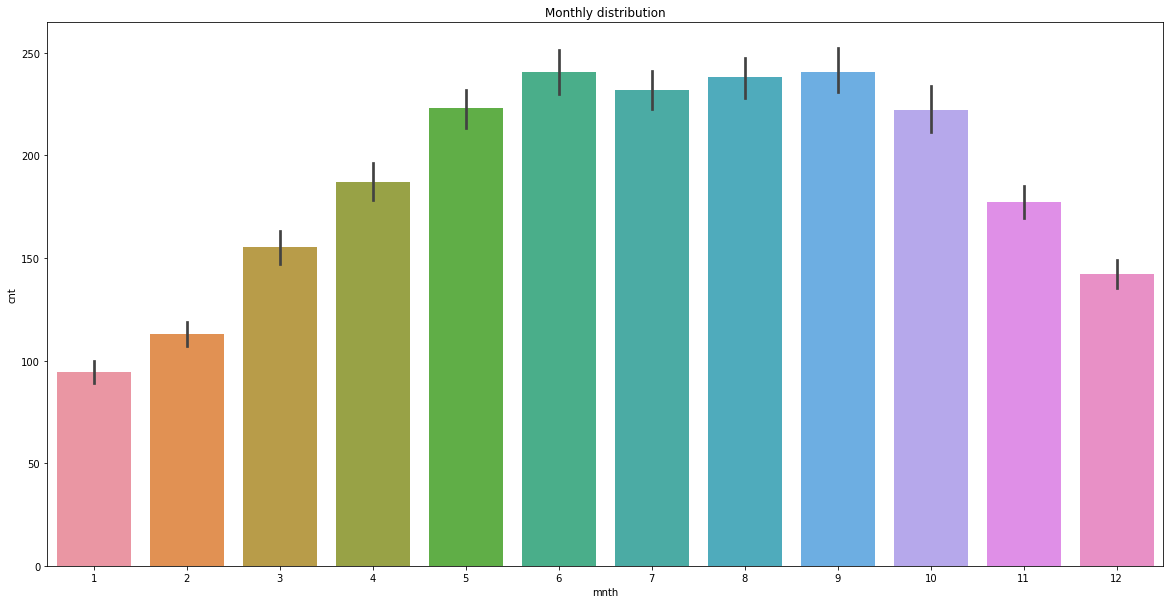

In [0]:
fig, ax = plt.subplots(figsize=(20,10))
sn.barplot(data=data[['mnth',
                      'cnt']],
            x='mnth', y='cnt')
ax.set(title="Monthly distribution")

<h4>We can see that the count is almost same between 6 and 10 month with the highest count between 200  to 250 in 6 and 9 month </h4>

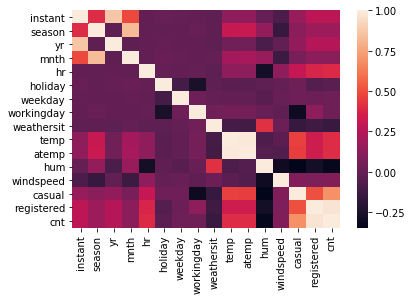

In [0]:
sn.heatmap(data.corr())

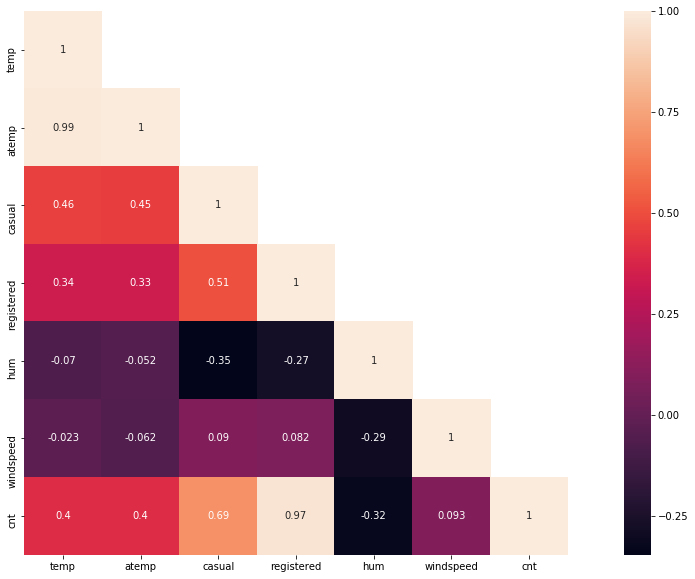

In [0]:
data_correlation = data[['temp', 'atemp', 'casual', 'registered', 'hum', 'windspeed', 'cnt']].corr()
mask = np.array(data_correlation)
mask[np.tril_indices_from(mask)] = False
fig = plt.subplots(figsize=(20,10))
sn.heatmap(data_correlation, mask=mask, vmax=1, square=True, annot=True)

<h4>We can see taht the maximum correlation of 0.99 is occuring between atemp and temp.So we can drop anyone among them</h4>

In [4]:
data=data.drop(['atemp'],axis=1)
data.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.75,0.0,0,1,1


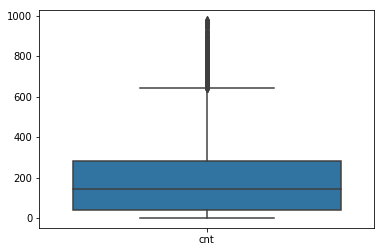

In [0]:
sn.boxplot(data=data[['cnt']])

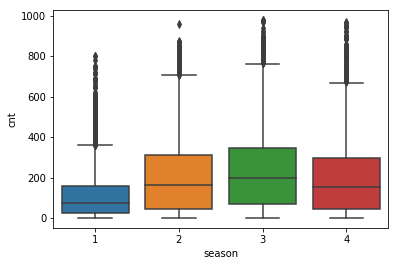

In [0]:
sn.boxplot(x=data['season'],y=data['cnt'])

<h4>We can see that there are more number of outliers in season 1 rather than the other seasons</h4>

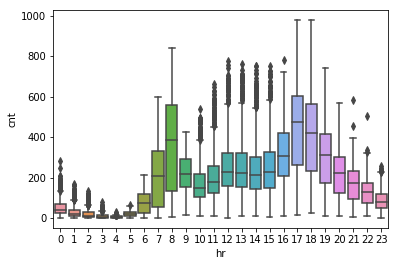

In [0]:
sn.boxplot(x=data['hr'],y=data['cnt'])

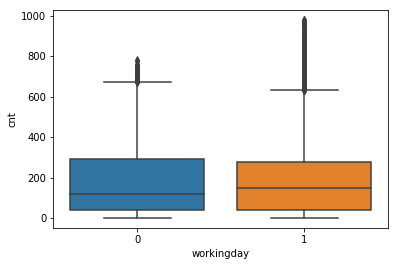

In [0]:
sn.boxplot(x=data['workingday'],y=data['cnt'])


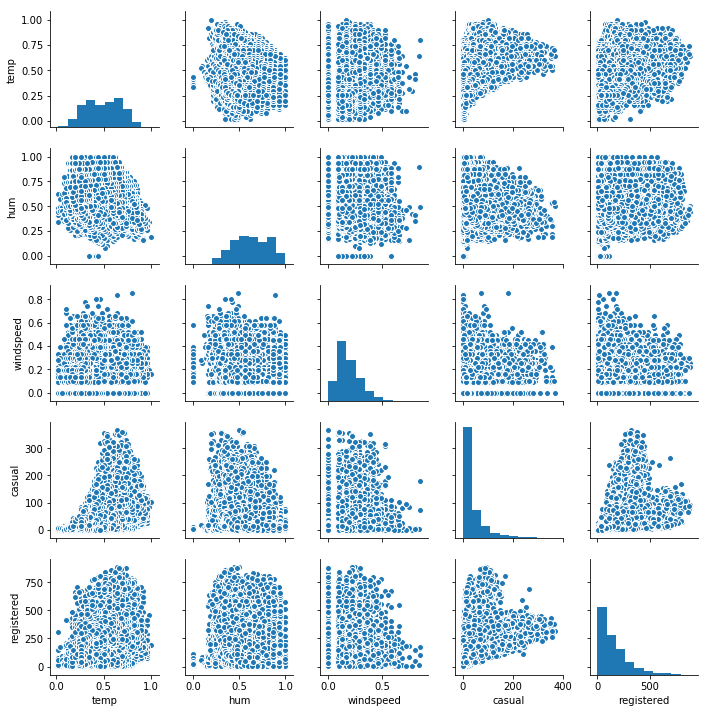

In [0]:
sn.pairplot(data[['temp','hum','windspeed','casual','registered']],size=2)

<function matplotlib.pyplot.hist>

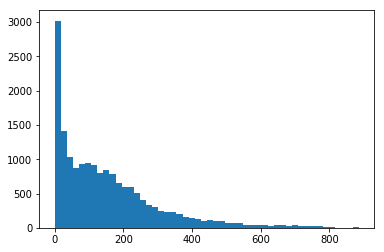

In [0]:
plt.hist(data['registered'],bins=50)
plt.hist

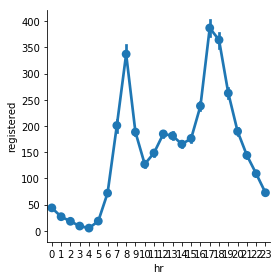

In [0]:
sn.factorplot(x='hr',y='registered',data=data)

<Figure size 720x360 with 0 Axes>

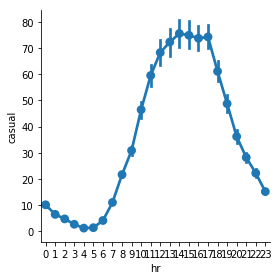

In [0]:
plt.figure(figsize=(10,5))
sn.factorplot(x='hr',y='casual',data=data)
plt.show()

<h4>From both the above plots we can see that the there are more number of regestered and that peaks at certain times rather tan casual that has smoothened over a range of hours</h4>

In [0]:
from scipy.stats import chi2_contingency
t=list(data.columns.values)
pvalues_d=[]
for i in range(len(t)-1):
    w=chi2_contingency(pd.crosstab(data[t[i]],data['cnt']))
    pvalues_d.append(w[1])
    
pvalues_d

[0.4371691750193054,
 0.3802866434287528,
 8.032149462264843e-86,
 6.822710108810713e-78,
 9.813363524219387e-41,
 0.0,
 0.9999999973671763,
 4.4029452997029746e-06,
 6.507987494971861e-13,
 0.9999999999999489,
 2.1869573306117007e-25,
 1.0,
 3.7234857361180716e-64,
 1.0,
 0.0,
 0.0]

In [0]:
len(t)

17

In [0]:
r=pd.DataFrame({'pvalue': pvalues_d,
     'variables': t[0:16],
    })

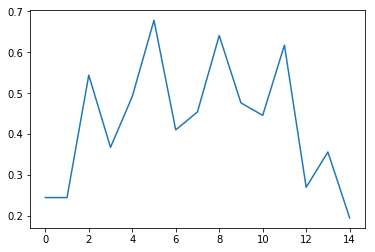

In [0]:
plt.plot(rt['pvalue'])

[Text(0.5,1,'collinearity between fetures and target variable')]

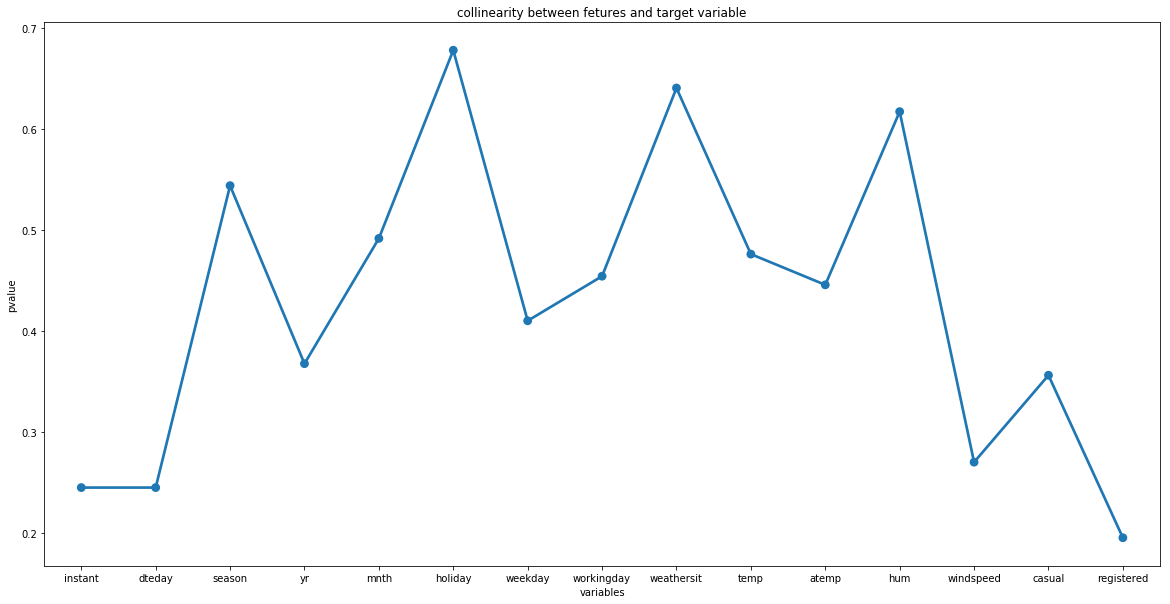

In [0]:
fig, ax = plt.subplots(figsize=(20,10))
sn.pointplot(data=rt,
            y='pvalue', x='variables',
             )
ax.set(title="collinearity between fetures and target variable")

<h4>We can see that all the values are above significance level of 0.005 which implies that there is no relationship between all the variables involved</h4>

In [0]:
e=pd.read_csv('day.csv')

In [0]:
e.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [0]:
e.shape

(731, 16)

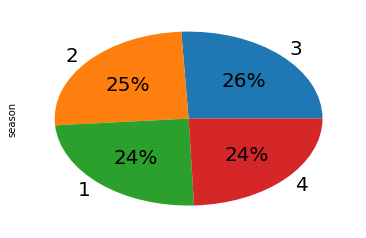

In [0]:
plt.figure()
data['season'].value_counts().plot(kind='pie',autopct='%.0f%%',fontsize=20)
plt.show()

<h4>We can see that all the seasons have around equal share of 25%</h4>

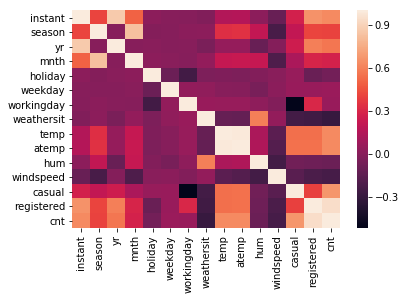

In [0]:
sn.heatmap(e.corr())

<h4>From the above correlation matrix we can see that the variable Registered has reltively high correlation to the target variable 'cnt' around 0.9.i.e they are highly correlated</h4>

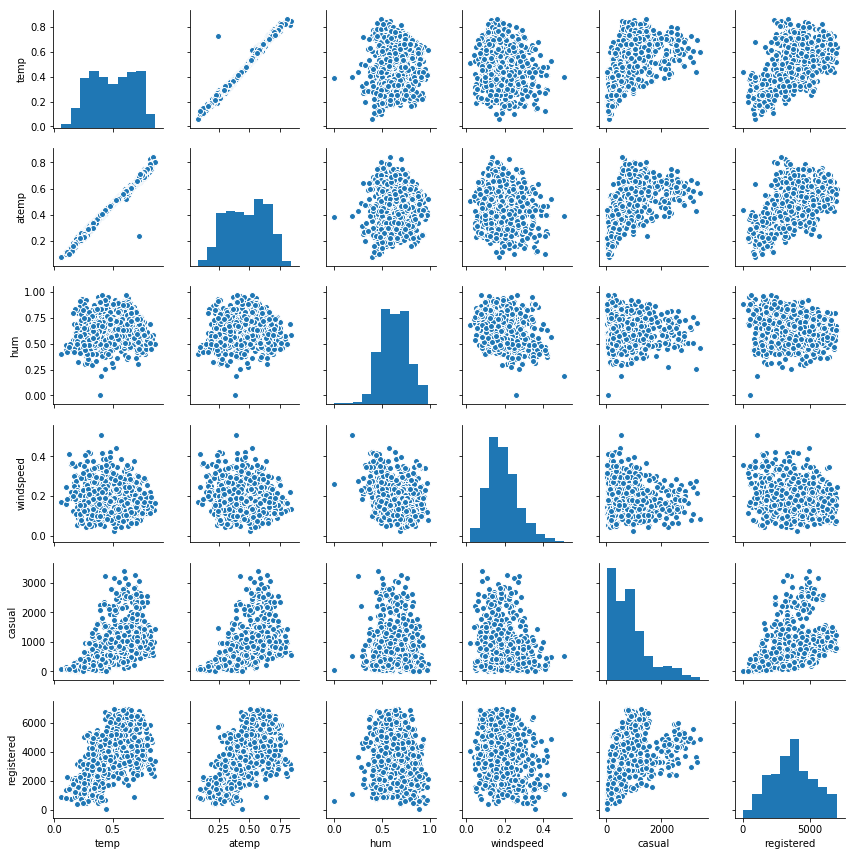

In [0]:
sn.pairplot(e[['temp','atemp','hum','windspeed','casual','registered']],size=2)

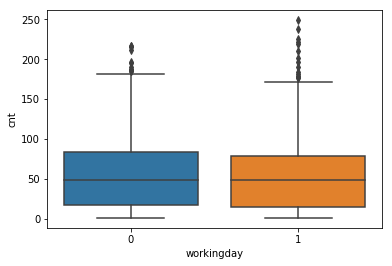

In [0]:
sn.boxplot(x=e['workingday'],y=data['cnt'])

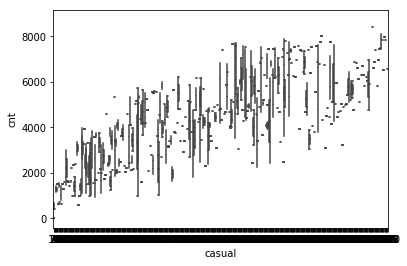

In [0]:
sn.boxplot(x=e['casual'],y=e['cnt'])

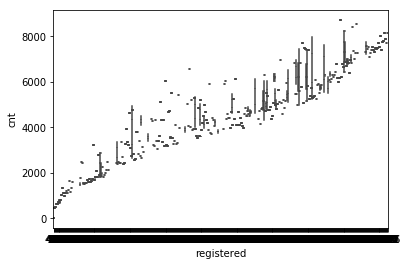

In [0]:
sn.boxplot(x=e['registered'],y=e['cnt'])

<h4>We could not infer anything from above plots as most of them seem to be random </h4>

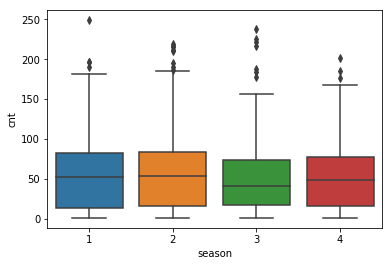

In [0]:
sn.boxplot(x=e['season'],y=data['cnt'])

<h4>We can see that season 3 has more outliers than that of the other seasons</h4>

[Text(0.5,1,'weekday distribution')]

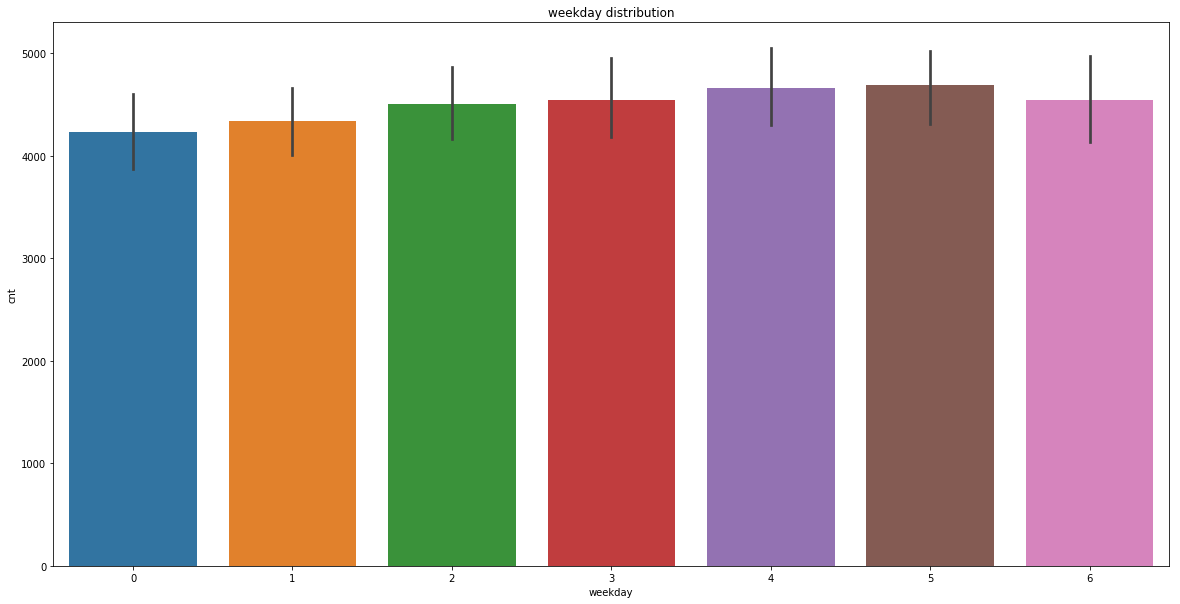

In [0]:
fig, ax = plt.subplots(figsize=(20,10))
sn.barplot(data=e[['weekday',
                      'cnt']],
            x='weekday', y='cnt')
ax.set(title="weekday distribution")

<h4>We could see that all the weekdays have good amount of count whih are allmost equal with 5 week day a bit highest among all</h4>

In [0]:
from scipy.stats import chi2_contingency
t=list(e.columns.values)
pvalues_e=[]
for i in range(len(t)-1):
    w=chi2_contingency(pd.crosstab(e[t[i]],e['cnt']))
    pvalues_e.append(w[1])
    
pvalues_e

[0.24500455359479942,
 0.24500455359479942,
 0.5440596338517547,
 0.3677242099789721,
 0.49177634472851295,
 0.6781463865579803,
 0.4102128310764939,
 0.45435914436398794,
 0.6407439686474228,
 0.476220056275107,
 0.4457849607714087,
 0.6173532722925076,
 0.27016109857610254,
 0.3562571201796444,
 0.19530578296219514]

In [0]:
rt=pd.DataFrame({'pvalue': pvalues_e,
     'variables': t[0:15],
    })

[Text(0.5,1,'collinearity between fetures and target variable')]

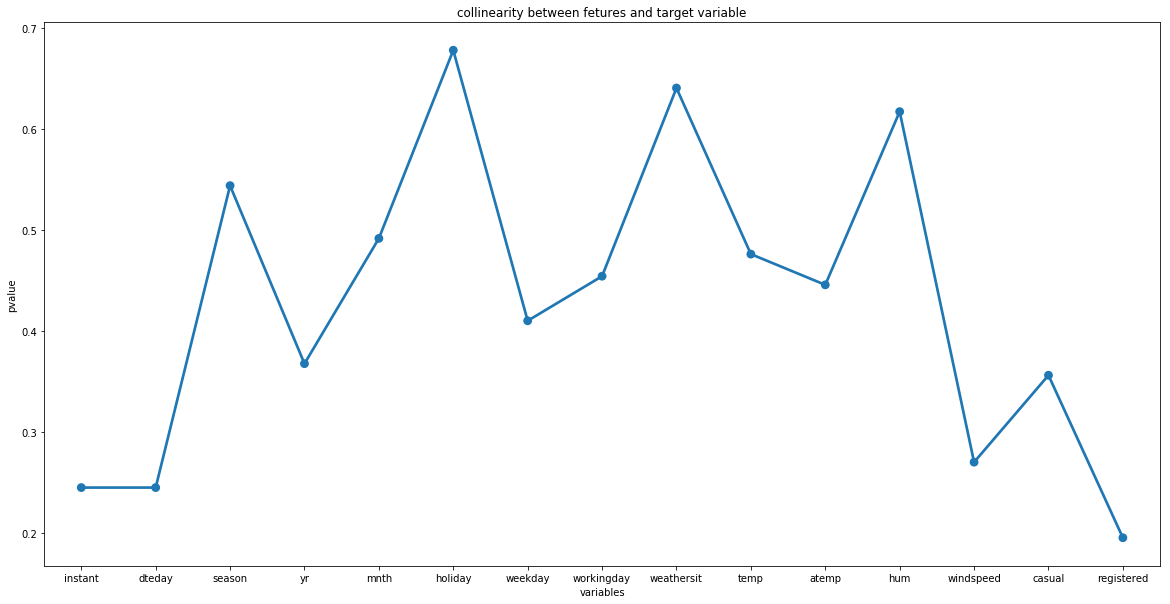

In [0]:
#src:https://discuss.analyticsvidhya.com/t/how-to-use-chi-square-test-to-find-multicollinearity/64878/2
fig, ax = plt.subplots(figsize=(20,10))
sn.pointplot(data=rt,
            y='pvalue', x='variables',
             ax=ax)
ax.set(title="collinearity between fetures and target variable")

<h4>Snice we could see that all the pvalues are greater than the significant level of 0.05 they(the variables) dnot have any correlation between them</h4>

In [5]:
from time import time
data['dteday'] = pd.to_datetime(data['dteday'])    
data['dteday'] = (data['dteday'] - data['dteday'].min()) / np.timedelta64(1,'D')

In [6]:

X_train,X_test,y_train,y_test = train_test_split(data,data['cnt'],
                                                    test_size=0.30) 
X_test,X_cv,y_test,y_cv = train_test_split(X_train,y_train,
                                                    test_size=0.30, 
                                                    random_state=42)    

print(X_train.shape)
print(X_test.shape)


(12165, 16)
(8515, 16)


<h3>Modelling</h3>

In [7]:
def RMSLE(y,ypred):
    y=np.nan_to_num(y)
    ypred=np.nan_to_num(ypred)
    calc=(ypred-y)**2
    return np.sqrt(np.mean(calc))

In [9]:
clf_1_cs=Lasso()
clf_1_cs.fit(X_train,y_train)
print("RMSLE score for train %f" %(RMSLE(y_train,clf_1_cs.predict(X_train))))
print("RMSLE score for cv %f" %(RMSLE(y_cv,clf_1_cs.predict(X_cv))))



RMSLE score for train 0.027121
RMSLE score for cv 0.026765


In [10]:
clf_1_cs=Ridge()
clf_1_cs.fit(X_train,y_train)
print("RMSLE score for train %f" %(RMSLE(y_train,clf_1_cs.predict(X_train))))
print("RMSLE score for cv %f" %(RMSLE(y_cv,clf_1_cs.predict(X_cv))))


RMSLE score for train 0.000001
RMSLE score for cv 0.000001


In [11]:
clf_1_cs=LinearRegression()
clf_1_cs.fit(X_train,y_train)
print("RMSLE score for train %f" %(RMSLE(y_train,clf_1_cs.predict(X_train))))
print("RMSLE score for cv %f" %(RMSLE(y_cv,clf_1_cs.predict(X_cv))))


RMSLE score for train 0.000000
RMSLE score for cv 0.000000


In [0]:
from sklearn.metrics import fbeta_score, make_scorer
clf_2_cs=Ridge()
params={'alpha':[0.05,0.1,0.5,1,2,3,4,10]}
rmsle_scorer=make_scorer(RMSLE,greater_is_better=False)
grid_2_cs=GridSearchCV(clf_2_cs,param_grid=params,scoring=rmsle_scorer,cv=5)
grid_2_cs.fit(X_train,y_train)
print ("Best params", grid_2_cs.best_params_)


Best params {'alpha': 0.05}


In [0]:
from sklearn.ensemble import RandomForestRegressor
clf_4_cs=RandomForestRegressor()
param={'n_estimators':[100,200,300,400,500],'max_depth':[4,5,6,7,8,9,10]}
grid_4_cs=GridSearchCV(clf_4_cs,param_grid=param,scoring=rmsle_scorer,cv=5,n_jobs=4)
grid_4_cs.fit(X_train,y_train)
print ("Best params",grid_4_cs.best_params_)
print("RMSLE score for casual train %f" %(RMSLE(y_train,grid_4_cs.best_estimator_.predict(X_train))))
print("RMSLE score for casual test %f" %(RMSLE(y_cv,grid_4_cs.best_estimator_.predict(X_cv))))

Best params {'max_depth': 10, 'n_estimators': 300}
RMSLE score for casual train 0.161935
RMSLE score for casual test 0.125433


In [15]:
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
clf_final_cs=RandomForestRegressor(n_estimators=300,max_depth=10)

clf_final_cs.fit(X_train,y_train)
#clf_final_cr.fit(train_cr_sd,train['target_cr'].values)
y_pred1=clf_final_cs.predict(X_cv)
#pred_cr=(np.exp(clf_final_cr.predict(test_cr_sd)))-1
print("MSE of cv: %.2f" % mean_squared_error(y_cv, y_pred1))

MSE of cv: 0.01


In [16]:
y_pred=clf_final_cs.predict(X_test)
#pred_cr=(np.exp(clf_final_cr.predict(test_cr_sd)))-1
print("MSE of test: %.2f" % mean_squared_error(y_test, y_pred))

MSE of test: 0.01


In [17]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
import sklearn.metrics as sm

print('Median absolute error ',round(sm.median_absolute_error(y_test,y_pred),2))
print('explained variance score',round(sm.explained_variance_score(y_test,y_pred),2))
print('R2 score = ',round(sm.r2_score(y_test,y_pred),2))

Median absolute error  0.0
explained variance score 1.0
R2 score =  1.0


<h4>Thus the random forest regressor gave good performance with test and cv errors (MSE value) of 0.01 which tells the classifier is performing well</h4>